In [1]:
## Clonamos el repositorio con las imagenes
!git clone https://github.com/JuanMCarreonCh/apple-orange-dataset.git

Cloning into 'apple-orange-dataset'...
remote: Enumerating objects: 3279, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 3279 (delta 3), reused 10 (delta 2), pack-reused 3268 (from 1)
Receiving objects: 100% (3279/3279), 55.19 MiB | 11.45 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Updating files: 100% (3514/3514), done.


In [1]:
## Importamos las librerias que utilizaremos para leer las imagenes
## si hacen falta las agregaremos despues
from glob import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import PIL
import cv2

In [2]:
# Podemos ver que glob devuelve una lista directorios dependiendo si le pasamos
# una ruta directa o si le pasamos una ruta con un wildcard
list(glob("apple-orange-dataset/train/"))

['apple-orange-dataset/train/']

In [3]:
# leemos las rutas
train_apple_paths = list(glob("apple-orange-dataset/train/apples/*.jpg"))
train_orange_paths = list(glob("apple-orange-dataset/train/oranges/*.jpg"))
test_apple_paths = list(glob("apple-orange-dataset/test/apples/*.jpg"))
test_orange_paths = list(glob("apple-orange-dataset/test/oranges/*.jpg"))

In [4]:
# Pasamos todas las imagenes a un tamaño especifico de 100x100 para poderlas trabajar
# Definimos que los colores a rgb
train_apple_imgs = [cv2.resize(cv2.cvtColor(cv2.imread(path),
                                            cv2.COLOR_BGR2RGB),(100,100)) for path in train_apple_paths]
train_orange_imgs = [cv2.resize(cv2.cvtColor(cv2.imread(path),
                                            cv2.COLOR_BGR2RGB),(100,100)) for path in train_orange_paths]
test_apple_imgs = [cv2.resize(cv2.cvtColor(cv2.imread(path),
                                            cv2.COLOR_BGR2RGB),(100,100)) for path in test_apple_paths]
test_orange_imgs = [cv2.resize(cv2.cvtColor(cv2.imread(path),
                                            cv2.COLOR_BGR2RGB),(100,100)) for path in test_orange_paths]
train_apple_imgs[0]

array([[[255, 255, 253],
        [255, 255, 253],
        [255, 255, 255],
        ...,
        [193, 187, 173],
        [140, 135, 110],
        [112, 108,  82]],

       [[255, 255, 253],
        [255, 255, 253],
        [255, 255, 255],
        ...,
        [ 93,  90,  77],
        [ 63,  58,  53],
        [ 58,  55,  49]],

       [[255, 255, 253],
        [255, 255, 253],
        [255, 255, 255],
        ...,
        [ 54,  55,  40],
        [ 43,  44,  30],
        [ 44,  50,  28]],

       ...,

       [[174, 196, 181],
        [208, 229, 221],
        [210, 232, 219],
        ...,
        [ 62,  97,  43],
        [ 69,  96,  53],
        [ 61,  84,  45]],

       [[201, 224, 206],
        [216, 239, 219],
        [179, 205, 172],
        ...,
        [ 79, 106,  59],
        [ 65,  86,  49],
        [ 38,  58,  22]],

       [[185, 210, 183],
        [187, 211, 182],
        [148, 177, 121],
        ...,
        [ 46,  72,  26],
        [118, 139, 102],
        [163, 186, 148]]

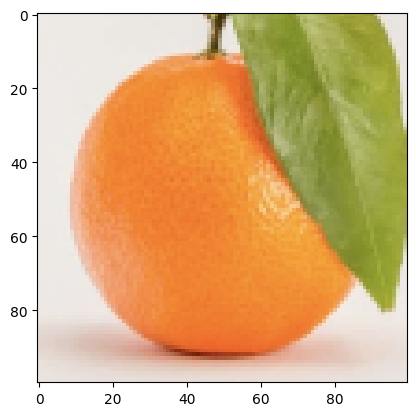

In [5]:
# Guardamos las imagenes originales en una copia por si acaso queremos verlas despues
train_apples = train_apple_imgs.copy()
train_oranges = train_orange_imgs.copy()
test_apples = test_apple_imgs.copy()
test_oranges = test_orange_imgs.copy()
plt.imshow( train_oranges[17])

1566
1672
198
74


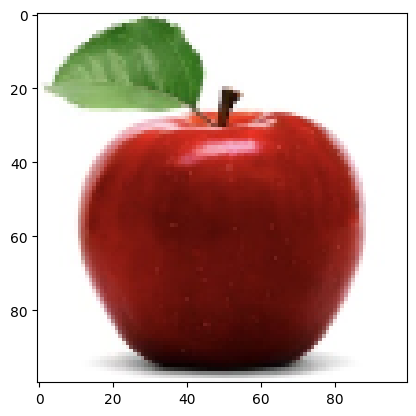

In [6]:
# Revisamos la cantidad de datos que tenemos
print(len(train_apple_imgs))
print(len(train_orange_imgs))
print(len(test_apple_imgs))
print(len(test_orange_imgs))
plt.imshow( train_apple_imgs[17])

In [7]:
# Vamos a probar con todos los colores
train_apple_imgs = np.array(train_apple_imgs[:])
train_orange_imgs = np.array(train_orange_imgs[:1566])
test_apple_imgs = np.array(test_apple_imgs[:74])
test_orange_imgs = np.array(test_orange_imgs[:])

In [8]:
# Comprobamos la igualdad de datos
print(len(train_apple_imgs))
print(len(train_orange_imgs))
print(len(test_apple_imgs))
print(len(test_orange_imgs))
test_orange_imgs.shape

1566
1566
74
74


(74, 100, 100, 3)

In [9]:
## Concatenamos los arrays para tener todos los datos en un solo array
## tanto en train como test
x_train = np.concatenate((train_apple_imgs, train_orange_imgs))
x_test = np.concatenate((test_apple_imgs, test_orange_imgs))

In [10]:
# Como sabemos que al concatenar solo se hace un union y se respeta el orden
# Creamos los labels y le vamos a dar la siguiente clasificacion
# Manzanas = 0
# Naranjas = 1
y_train = np.concatenate((np.zeros(train_apple_imgs.shape[0]),
                                    np.ones(train_orange_imgs.shape[0])
                                    ))
y_test = np.concatenate((np.zeros(len(test_apple_imgs)),
                                    np.ones(len(test_orange_imgs))
                                    ))

In [11]:
# Hacemos un pequeño escalado a los datos para dejarlos en rango de 0 a 1
x_train = x_train/255
x_test = x_test/255

In [12]:
# importamos las librerias
import tensorflow as tf

2024-09-04 21:07:59.430641: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-04 21:07:59.443203: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-04 21:07:59.447037: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-04 21:07:59.456583: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-04 21:08:00.113094: W tensorflow/compiler/tf2

In [13]:
## Comenzamos a armar nuestro modelo
model = tf.keras.models.Sequential([
  # Agregamos la capa de entrada definiendo que entraran imagenes de 100x100
  tf.keras.layers.Input((100,100,3)),

  # Agregamos una primera etapa con una capa de convolucion y una capa de pooling
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  # Agregamos una segunda etapa con una capa de convolucion y una capa de pooling
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  # Agregamos una tercera etapa con una capa de convolucion y una capa de pooling
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  #Agregamos una capa de flaten para dejar un arreglo de 1 dimension
  tf.keras.layers.Flatten(),

  # Agregamos una quinta etapa con una capa densa que trabaje con el arreglo (dense)
  tf.keras.layers.Dense(254, activation='relu'),

  # Agregamos una capa de salida que nos devuelva 2 categorias 0 y 1 de tipo softmax
  tf.keras.layers.Dense(2, activation='softmax')
])

I0000 00:00:1725505682.934681   15325 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1725505682.958158   15325 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1725505682.958204   15325 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1725505682.959604   15325 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1725505682.959666   15325 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [14]:
# Compilamos nuestra red y utilizaremos el optimizador Adam
# y lafuncion de perdida de crossentropy
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 254)            │     1,625,854 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,775,804 (6.77 MB)

 Trainable params: 1,775,804 (6.77 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20


I0000 00:00:1725505689.390200   15447 service.cc:146] XLA service 0x7f08f0004ee0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725505689.390241   15447 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-09-04 21:08:09.412600: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-04 21:08:09.542210: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 9/98 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5151 - loss: 0.9492

I0000 00:00:1725505694.063431   15447 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.7436 - loss: 0.4972
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9600 - loss: 0.1067
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9775 - loss: 0.0485
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9856 - loss: 0.0340
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9936 - loss: 0.0209
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9870 - loss: 0.0343
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9885 - loss: 0.0269
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9966 - loss: 0.0149
Epoch 9/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9948 - loss: 0.0127
Epoch 10/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9975 - loss: 0.0074
Epoch 11/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9967 - loss: 0.0084
Epoch 12/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9880 - 

In [17]:
# Evaluamos nuestro modelo ahora probando con las imagenes de prueba que teniamos
# inicialmente separadas
result = model.evaluate(x_test, y_test)
print(f"Accuracy: {result[1]}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 432ms/step - accuracy: 0.9056 - loss: 0.5174
Accuracy: 0.9459459185600281


Apple index=19
Label: 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediction: 0


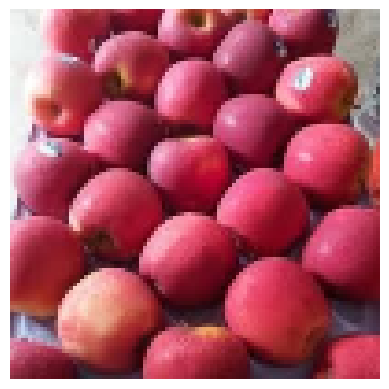

In [98]:
# Revisamos algunos resultados al azar
import random

test_index = random.randint(0, 148 - 1)

plt.imshow(x_test[test_index],cmap='gray')
if(test_index < 74):
  print(f"Apple index={test_index}")
else:
  print(f"Orange index={test_index}")
plt.axis(False)

print("Label:", y_test[test_index])
input_image = np.reshape(x_test[test_index], (1, 100, 100, 3))
prediction = model.predict(input_image)
print("Prediction:", np.argmax(prediction))

Apple index=29


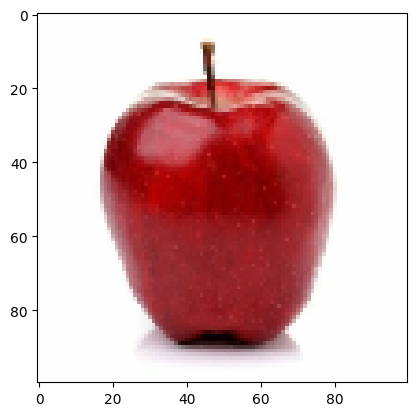

In [27]:
# Recordando guardamos una copia de las imagenes orginales,
# y tambien siempre se mantuvo el orden de los dataframe con las manzanas
# primero y despues las naranjas por el union que se hizo
# y nunca se reordenaron
if(test_index < 74):
  print(f"Apple index={test_index}")
  plt.imshow(test_apples[test_index])
else:
  print(f"Orange index={test_index}")
  plt.imshow(test_oranges[test_index-74])

# Conclusión
Como podemos observar que el modelo consigue una precision de un 90.48 por ciento al solo usar solo el canal verde demostrando que la diferencia en el canal verde si muestra un poco la diferencia entre manzanas y naranjas, aunque aun asi es un poco pobre la precision y podriamos intentar con mas canales o talvez aplicando mascaras a los colores.  
Se utilizaron etapas de capas de convolucion2d para filtros de tamaño 3x3 junto con capas de max pooling de 2x2 para ir reduciendo las imagenes para quedarnos con los valores mas grandes, que esperariamos fueran los que son naranjas por tener un tonor verde mas fuerte.  
La cantidad de neuronas por capa la tomamos un poco al 64 como base. Todas las capas ocultas las dejamos con la funcion de activacion 'Relu' y utilizamos la funcion de activacion softmax para obtener un resultado de dos categorias.  
Se observa que donde mas problemas tiene para clasificar de buena manera las manzanas es cuando el color no es rojo, sino que se encuentran un poco amarillas.  

Para el caso donde se utilizaron todos los canales de color se obtiene una mejor precision del modelo pasando de 90 a 94, que ya es un gran avance

In [99]:
# Guardamos nuestro modelo
model.save('modelo_class_oranges_vs_apples.keras')

In [122]:
# checamos otras metricas
from sklearn.metrics import roc_auc_score,recall_score,accuracy_score,precision_recall_curve, roc_curve
y_test_pred = model.predict(x_test)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [108]:
y_test_pred.shape

(148, 2)

In [112]:
y_test_pred_cat = np.argmax(y_test_pred,axis=1)

In [113]:
y_test_pred_cat.shape

(148,)

In [130]:
precision, recall, _ = precision_recall_curve(y_test, y_test_pred_cat)
precision

array([0.5       , 0.90243902, 1.        ])

In [128]:
roc_auc = roc_auc_score(y_test,y_test_pred_cat)

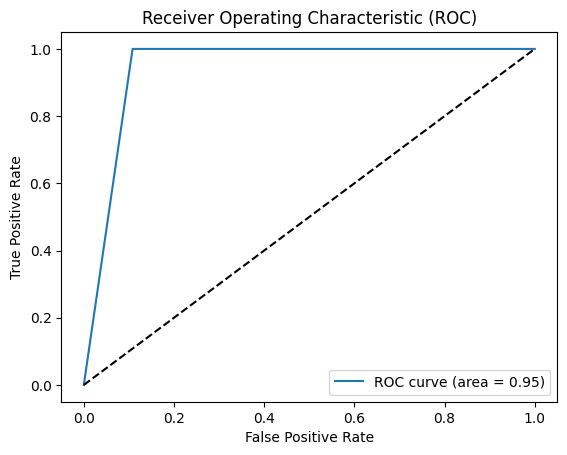

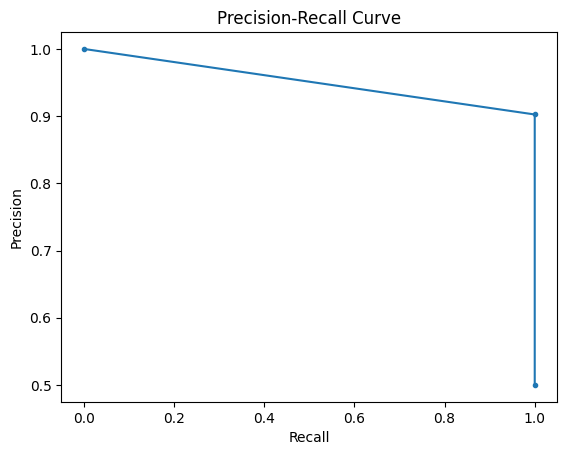

In [129]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_test_pred_cat)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Graficar la curva Precision-Recall
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()